<a href="https://colab.research.google.com/github/Hercules-Peters/DevCount_001/blob/main/milk_production_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading Files**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving milk-production.csv to milk-production.csv


**Importing necessary Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout
%matplotlib inline

**Reading the dataset**

In [3]:
df = pd.read_csv('milk-production.csv',index_col='Days')
df.index = pd.to_datetime(df.index)
df

,Milk Production
Days,
2023-08-01,17782.80
2023-08-02,17965.80
2023-08-03,17479.60
2023-08-04,17418.90
2023-08-05,17224.73
...,...
2024-05-15,9827.60
2024-05-16,9814.00
2024-05-17,9755.50


In [4]:
print(df['Milk Production'].dtype)


float64


In [5]:
df['Milk Production'] = pd.to_numeric(df['Milk Production'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2023-08-01 to 2024-05-19
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Milk Production  293 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


In [6]:
print(df['Milk Production'].isna().sum())


0


In [7]:
# Handle NaN values if needed (e.g., drop them)
df = df.dropna(subset=['Milk Production'])

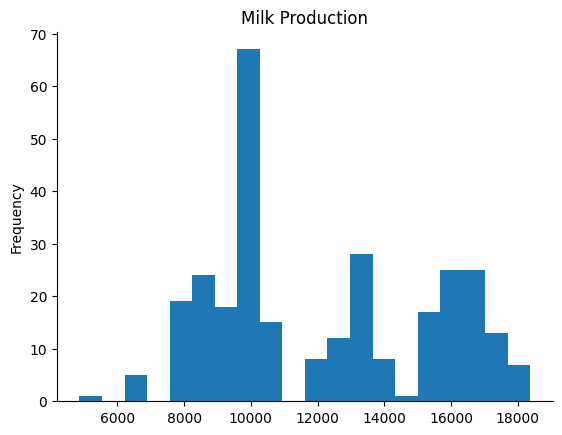

In [8]:
# @title Milk Production

from matplotlib import pyplot as plt
df['Milk Production'].plot(kind='hist', bins=20, title='Milk Production')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Days'>

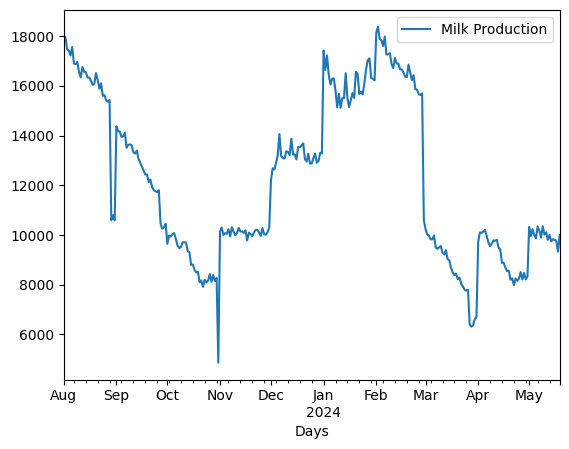

In [9]:
df.plot()

In [10]:
scaler = MinMaxScaler()

array = []
train_data = []
train_labels = []

for i in range(len(df)):
    array.append(df.iloc[i]['Milk Production'])

array = np.array(array).reshape(-1,1)
array = scaler.fit_transform(array)
array

array([[0.95579739],
       [0.96933559],
       [0.93336687],
       [0.92887633],
       [0.91451177],
       [0.93960332],
       [0.89048109],
       [0.8882987 ],
       [0.89531933],
       [0.86520237],
       [0.84888254],
       [0.88020537],
       [0.86587558],
       [0.8654687 ],
       [0.84875678],
       [0.84888994],
       [0.83990146],
       [0.82713264],
       [0.82992166],
       [0.86199167],
       [0.84175094],
       [0.81533294],
       [0.83174155],
       [0.79420446],
       [0.79637945],
       [0.78037034],
       [0.77707826],
       [0.7819387 ],
       [0.42380505],
       [0.4389708 ],
       [0.42400479],
       [0.70392756],
       [0.68953119],
       [0.68792584],
       [0.67187234],
       [0.67393636],
       [0.68466336],
       [0.63984671],
       [0.64848749],
       [0.64970075],
       [0.64737041],
       [0.62643427],
       [0.62253557],
       [0.63153144],
       [0.60761395],
       [0.59554793],
       [0.58299365],
       [0.571

In [11]:
k = 0
for i in range(len(array)):
    try:
        train_data.append(array[12*k:12*(k+1)])
        train_labels.append(array[12*(k+1)])
        k+=1
    except:
        break

In [12]:
print(type(train_data))
print(train_data)

<class 'list'>
[array([[0.95579739],
       [0.96933559],
       [0.93336687],
       [0.92887633],
       [0.91451177],
       [0.93960332],
       [0.89048109],
       [0.8882987 ],
       [0.89531933],
       [0.86520237],
       [0.84888254],
       [0.88020537]]), array([[0.86587558],
       [0.8654687 ],
       [0.84875678],
       [0.84888994],
       [0.83990146],
       [0.82713264],
       [0.82992166],
       [0.86199167],
       [0.84175094],
       [0.81533294],
       [0.83174155],
       [0.79420446]]), array([[0.79637945],
       [0.78037034],
       [0.77707826],
       [0.7819387 ],
       [0.42380505],
       [0.4389708 ],
       [0.42400479],
       [0.70392756],
       [0.68953119],
       [0.68792584],
       [0.67187234],
       [0.67393636]]), array([[0.68466336],
       [0.63984671],
       [0.64848749],
       [0.64970075],
       [0.64737041],
       [0.62643427],
       [0.62253557],
       [0.63153144],
       [0.60761395],
       [0.59554793],
       [0.58

In [13]:
import numpy as np

# Example train_data, replace with your actual data
# train_data = [...]

# Print the structure of train_data
print(type(train_data))
print(train_data)

# Convert to NumPy array if it is a list
if isinstance(train_data, list):
    try:
        train_data = np.array(train_data)
    except ValueError as e:
        print("Error converting to NumPy array:", e)

        # Find maximum shape along each dimension
        max_shape = np.max([np.shape(elem) for elem in train_data], axis=0)
        print("Max shape needed:", max_shape)

        # Pad each element to match the max shape
        padded_train_data = []
        for elem in train_data:
            # Calculate the padding widths for each dimension
            pad_widths = [(0, max_dim - curr_dim) for curr_dim, max_dim in zip(np.shape(elem), max_shape)]
            padded_elem = np.pad(elem, pad_widths, mode='constant')
            padded_train_data.append(padded_elem)

        # Convert the padded list to a NumPy array
        train_data = np.array(padded_train_data)

# Squeeze the array
train_data = np.squeeze(train_data)
print(train_data.shape)


<class 'list'>
[array([[0.95579739],
       [0.96933559],
       [0.93336687],
       [0.92887633],
       [0.91451177],
       [0.93960332],
       [0.89048109],
       [0.8882987 ],
       [0.89531933],
       [0.86520237],
       [0.84888254],
       [0.88020537]]), array([[0.86587558],
       [0.8654687 ],
       [0.84875678],
       [0.84888994],
       [0.83990146],
       [0.82713264],
       [0.82992166],
       [0.86199167],
       [0.84175094],
       [0.81533294],
       [0.83174155],
       [0.79420446]]), array([[0.79637945],
       [0.78037034],
       [0.77707826],
       [0.7819387 ],
       [0.42380505],
       [0.4389708 ],
       [0.42400479],
       [0.70392756],
       [0.68953119],
       [0.68792584],
       [0.67187234],
       [0.67393636]]), array([[0.68466336],
       [0.63984671],
       [0.64848749],
       [0.64970075],
       [0.64737041],
       [0.62643427],
       [0.62253557],
       [0.63153144],
       [0.60761395],
       [0.59554793],
       [0.58

In [14]:
print(type(train_data))
print(train_data)

<class 'numpy.ndarray'>
[[0.95579739 0.96933559 0.93336687 0.92887633 0.91451177 0.93960332
  0.89048109 0.8882987  0.89531933 0.86520237 0.84888254 0.88020537]
 [0.86587558 0.8654687  0.84875678 0.84888994 0.83990146 0.82713264
  0.82992166 0.86199167 0.84175094 0.81533294 0.83174155 0.79420446]
 [0.79637945 0.78037034 0.77707826 0.7819387  0.42380505 0.4389708
  0.42400479 0.70392756 0.68953119 0.68792584 0.67187234 0.67393636]
 [0.68466336 0.63984671 0.64848749 0.64970075 0.64737041 0.62643427
  0.62253557 0.63153144 0.60761395 0.59554793 0.58299365 0.57124574]
 [0.56005267 0.56040777 0.53791068 0.54489432 0.52334416 0.51370466
  0.51019804 0.5078603  0.51328298 0.41459463 0.39871868 0.40300948]
 [0.41312244 0.35371709 0.37834479 0.37552618 0.38261339 0.38576491
  0.36823182 0.34885665 0.3408373  0.34435871 0.35834819 0.35816324]
 [0.35815584 0.33201157 0.32899322 0.29130818 0.29232169 0.27681564
  0.2687297  0.27057179 0.23972243 0.24502674 0.2255702  0.24712036]
 [0.23897524 0.244

In [15]:
train_data = np.squeeze(train_data)
train_data.shape

(25, 12)

In [16]:
train_labels = np.array(train_labels)
train_labels.shape

(24, 1)

In [17]:
train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data,1)
train_data.shape

(24, 1, 12)

In [18]:
train_data[1]

array([[0.86587558, 0.8654687 , 0.84875678, 0.84888994, 0.83990146,
        0.82713264, 0.82992166, 0.86199167, 0.84175094, 0.81533294,
        0.83174155, 0.79420446]])

In [22]:
train_labels[1]

array([0.79637945])

In [23]:
model = Sequential()

model.add(LSTM(250,input_shape=(1,12)))
model.add(Dropout(0.5))


model.add(Dense(250,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250)               263000    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 12)                3012      
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [24]:
E = 2000

H = model.fit(train_data,train_labels,epochs=E)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 0.3290
Epoch 2/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.3176
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.2465
Epoch 4/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.2661
Epoch 5/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.2621
Epoch 6/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1611
Epoch 7/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1209
Epoch 8/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.1461
Epoch 9/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.1200
Epoch 10/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.1001
Epoch 11/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.1338
Epoch 12/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.1315
Epoch 13/2000
1/1 [====================

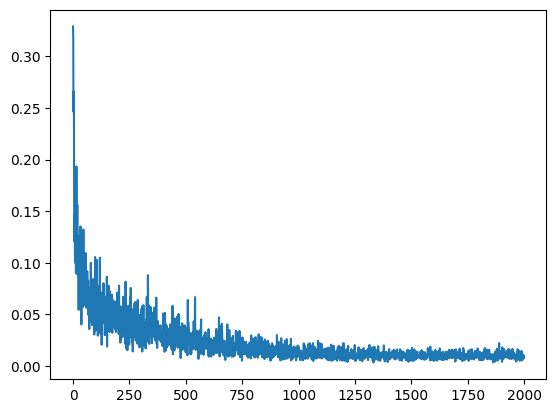

In [25]:
epochs = range(0,E)
loss = H.history['loss']
plt.plot(epochs,loss)

1/1 [==============================] - 0s 461ms/step
preds shape: (24, 1)
real_values shape: (24, 1)


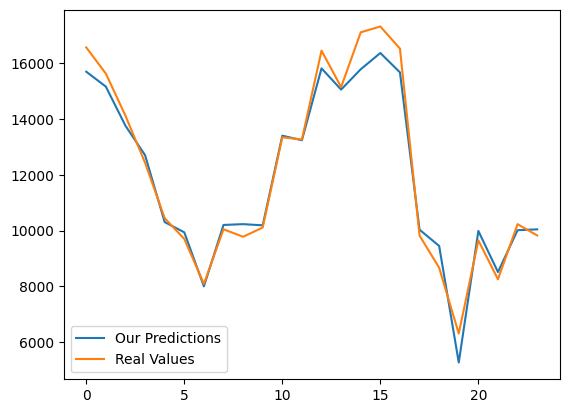

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions and inverse transform
preds = scaler.inverse_transform(model.predict(train_data))
real_values = scaler.inverse_transform(train_labels)

# Check and print the shapes of preds and real_values
print(f"preds shape: {preds.shape}")
print(f"real_values shape: {real_values.shape}")

# Ensure the shapes are correct for plotting
if preds.ndim > 1 and preds.shape[1] == 1:
    preds = preds.flatten()
if real_values.ndim > 1 and real_values.shape[1] == 1:
    real_values = real_values.flatten()

# Ensure the lengths match
num_points = min(len(preds), len(real_values))
preds = preds[:num_points]
real_values = real_values[:num_points]

# Plot the predictions and real values
plt.plot(range(num_points), preds, label='Our Predictions')
plt.plot(range(num_points), real_values, label='Real Values')
plt.legend()
plt.show()

In [27]:
seed = array[-14:]
seed

array([[0.40488855],
       [0.39312585],
       [0.37241905],
       [0.40624237],
       [0.38140013],
       [0.38817663],
       [0.3658275 ],
       [0.3804532 ],
       [0.3611594 ],
       [0.36727749],
       [0.36627137],
       [0.36194358],
       [0.33059857],
       [0.37983917]])

In [28]:
model.save("Milk-predicter-model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
seed.shape

(14, 1)

In [31]:
for _ in range(14):
    curr_14_days = seed[-12:]
    curr_14_days = np.squeeze(curr_14_days)
    curr_14_days = np.expand_dims(curr_14_days,0)
    curr_14_days = np.expand_dims(curr_14_days,0)
    pred = model.predict(curr_14_days)
    seed = np.append(seed,pred)

1/1 [==============================] - 0s 96ms/step


In [32]:
seed

array([0.40488855, 0.39312585, 0.37241905, 0.40624237, 0.38140013,
       0.38817663, 0.3658275 , 0.3804532 , 0.3611594 , 0.36727749,
       0.36627137, 0.36194358, 0.33059857, 0.37983917, 0.38274494,
       0.38712615, 0.39203721, 0.39610946, 0.39884275, 0.39925247,
       0.40124035, 0.40135658, 0.40110147, 0.40140003, 0.40194258,
       0.40148568, 0.40139836, 0.40136701])

**Trying to predict 2weeks Production**

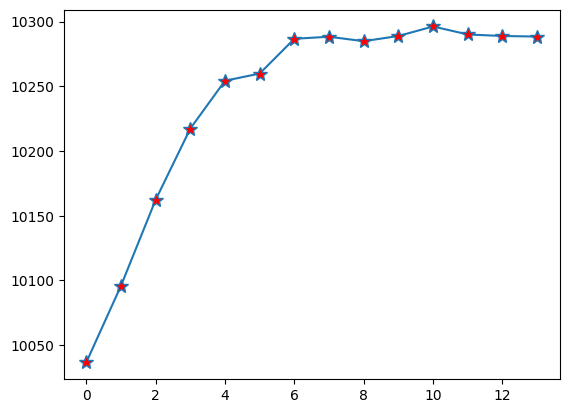

In [33]:
next_year_prediction = scaler.inverse_transform(seed[-14:].reshape(-1,1))
plt.plot(range(0,14),next_year_prediction,marker='*',markerfacecolor='red',markersize=10)